In [1]:
from PIL import Image, ImageDraw, ImageFont
import json, random, os, sys
sys.path.append("../scripts/diffuser_icons/")
import numpy as np


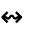

In [6]:
im = Image.new("RGB", (32, 32), (255,255,255))
draw = ImageDraw.Draw(im)
unicode_text = "\u21ad"
unicode_font = ImageFont.truetype("DejaVuSans.ttf", 28)
draw.text((0, 0), unicode_text, font=unicode_font, fill="black")
im

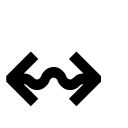

In [2]:
im = Image.new("RGB", (128, 128), (255,255,255))
draw = ImageDraw.Draw(im)
unicode_text = "\u21ad"
unicode_font = ImageFont.truetype("DejaVuSans.ttf", 128)
draw.text((0, 0), unicode_text, font=unicode_font, fill="black")
im

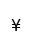

In [2]:
H, W = 16, 32
im = Image.new("RGB", (W, H*2), (255,255,255))
draw = ImageDraw.Draw(im)
unicode_text = ""#"\u0025"
unicode_text2 = "\u00a5"
msg = unicode_text+"\n"+unicode_text2
unicode_font = ImageFont.truetype("DejaVuSans.ttf", 16)
_, _, w, h = draw.textbbox((0, 0), unicode_text, font=unicode_font)
draw.text(((W-w)/2,(H-h)/2), unicode_text, font=unicode_font, fill="black")
_, _, w, h = draw.textbbox((0, 0), unicode_text2, font=unicode_font)
draw.text(((W-w)/2,(H-h)/2+H), unicode_text2, font=unicode_font, fill="black")
im

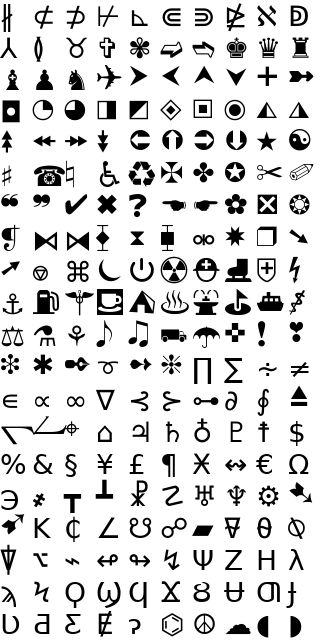

In [69]:
with open("../data/matplotlib/unicode.jsonl", "r", encoding="unicode-escape") as f: lines = f.readlines()
im = Image.new("RGB", (320, 640), (255,255,255))
draw = ImageDraw.Draw(im)

for i, l in enumerate(lines):
    unicode_text, _, font = json.loads(l)
    unicode_font = ImageFont.truetype(f"../scripts/diffuser_icons/fonts/{font}.ttf", 28)
    draw.text((32*(i%10),32*(i//10)), unicode_text, font=unicode_font, fill="black")
im.save(f"../data/matplotlib/unicode.png")
im

In [139]:
s = '𝄞'
print('U+{:X}'.format(ord(s)))
print(s.encode('unicode-escape').decode("ascii"))

U+1D11E
\U0001d11e


In [41]:
import torch
from torch.nn import Conv2d
from tqdm import trange

In [42]:
filter = Conv2d(
    in_channels=3,
    out_channels=1,
    kernel_size=(32, 32),
    bias=False
)

In [43]:
for n, p in filter.named_parameters():
    print(n, p.shape)

weight torch.Size([1, 3, 32, 32])


place_of_interest


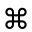

In [45]:
W, H = 32, 32
im = Image.new("RGB", (W, H), (255,255,255))
draw = ImageDraw.Draw(im)
with open("../data/matplotlib/unicode.jsonl", "r", encoding="unicode-escape") as f: lines = f.readlines()
i = random.choice(list(range(len(lines))))
unicode_text, _, font = json.loads(lines[i])
print(_)
unicode_font = ImageFont.truetype(f"{font}.ttf", 28)
_, _, w, h = draw.textbbox((0, 0), unicode_text, font=unicode_font)
draw.text(((W-w)/2,(H-h)/2), unicode_text, font=unicode_font, fill="black")
#draw.text((0,0), unicode_text, font=unicode_font, fill="black")
im

In [45]:
x = torch.Tensor(np.asarray(im)/255 - 0.5).permute(2, 0, 1)
filter.weight.data = x.unsqueeze(0)
filter(x).item()

736.6458129882812

In [46]:
results = []
for i in trange(len(lines)):
    im = Image.new("RGB", (W, H), (255,255,255))
    draw = ImageDraw.Draw(im)
    unicode_text, _, font = json.loads(lines[i])
    unicode_font = ImageFont.truetype(f"{font}.ttf", 28)
    _, _, w, h = draw.textbbox((0, 0), unicode_text, font=unicode_font)
    draw.text(((W-w)/2,(H-h)/2), unicode_text, font=unicode_font, fill="black")
    y = torch.Tensor(np.asarray(im)/255 - 0.5).permute(2, 0, 1)
    results.append(filter(y).item())
sorted(results, reverse=True)[:10]

100%|██████████| 200/200 [00:00<00:00, 915.17it/s] 


[736.6458129882812,
 666.9317626953125,
 646.3956909179688,
 633.4843139648438,
 628.2888793945312,
 626.4387817382812,
 615.9307861328125,
 611.075927734375,
 609.8104248046875,
 609.0770263671875]

In [49]:
gaps = []
with open("../data/matplotlib/unicode2.jsonl", "r", encoding="unicode-escape") as f: lines = f.readlines()
for i in trange(len(lines)):
    W, H = 32, 32
    im = Image.new("RGB", (W, H), (255,255,255))
    draw = ImageDraw.Draw(im)
    unicode_text, name, font = json.loads(lines[i])
    unicode_font = ImageFont.truetype(f"../scripts/diffuser_icons/fonts/{font}.ttf", 28)
    _, _, w, h = draw.textbbox((0, 0), unicode_text, font=unicode_font)
    draw.text(((W-w)/2,(H-h)/2), unicode_text, font=unicode_font, fill="black")
    x = torch.Tensor(np.asarray(im)/255 - 0.5).permute(2, 0, 1)
    filter.weight.data = x.unsqueeze(0)
    highest = filter(x).item()
    results = []

    for j in range(len(lines)):
        im2 = Image.new("RGB", (W, H), (255,255,255))
        draw2 = ImageDraw.Draw(im2)
        unicode_text2, _, font2 = json.loads(lines[j])
        unicode_font2 = ImageFont.truetype(f"../scripts/diffuser_icons/fonts/{font2}.ttf", 28)
        _, _, w, h = draw.textbbox((0, 0), unicode_text2, font=unicode_font2)
        draw2.text(((W-w)/2,(H-h)/2), unicode_text2, font=unicode_font2, fill="black")
        y = torch.Tensor(np.asarray(im2)/255 - 0.5).permute(2, 0, 1)
        results.append(filter(y).item())
     
    results = sorted(results, reverse=True)
    assert results[0] == highest
    gap = results[0] - results[1]
    gaps.append((gap, name))

100%|██████████| 201/201 [00:41<00:00,  4.87it/s]


In [50]:
sorted(gaps)

[(35.019775390625, 'leftward_two_headed_arrow'),
 (35.24713134765625, 'upward_two_headed_arrow'),
 (39.54913330078125, 'downward_two_headed_arrow'),
 (43.6558837890625, 'rightward_two_headed_arrow'),
 (44.47296142578125, 'infinity'),
 (52.18341064453125, 'cross_of_lorraine'),
 (52.9403076171875, 'latin_capital_j_stroke'),
 (55.30621337890625, 'proportional'),
 (56.3519287109375, 'sparkle'),
 (56.96099853515625, 'contour_integral'),
 (60.17315673828125, 'leftward_circled_arrow'),
 (60.34161376953125, 'rightward_circled_arrow'),
 (61.452880859375, 'greek_capital_eta'),
 (62.1680908203125, 'downward_circled_arrow'),
 (62.5430908203125, 'homothetic'),
 (62.682373046875, 'del_tilde'),
 (64.17529296875, 'upward_circled_arrow'),
 (65.07452392578125, 'pencil'),
 (65.53192138671875, 'greek_small_lamda'),
 (66.46514892578125, 'electric_arrow'),
 (67.1260986328125, 'position_indicator'),
 (67.53350830078125, 'chess_knight'),
 (67.90374755859375, 'sharp_music'),
 (69.09832763671875, 'nabla'),
 (69

## Evaluation

In [1]:
from PIL import Image, ImageDraw, ImageFont
import json, random, os, sys, re
sys.path.append("../scripts/diffuser_icons/")
import numpy as np
import torch
from torch.nn import Conv2d
from tqdm import trange, tqdm

In [2]:
### Create all filters
W, H = 32, 32
GTHS = []
with open("../data/nouns/all_nouns.txt", "r") as f: nouns = [x.strip() for x in f.readlines()]
with open("../data/matplotlib/unicode.jsonl", "r", encoding="unicode-escape") as f: 
    lines = f.readlines()
    icons_names = [json.loads(x)[1] for x in lines]
nouns_to_names = {n:m for n, m in zip(nouns, icons_names)}
for l in lines:
    im = Image.new("RGB", (W, H), (255,255,255))
    draw = ImageDraw.Draw(im)
    unicode_text, _, font = json.loads(l)
    unicode_font = ImageFont.truetype(f"../scripts/diffuser_icons/fonts/{font}.ttf", 28)
    _, _, w, h = draw.textbbox((0, 0), unicode_text, font=unicode_font)
    draw.text(((W-w)/2,(H-h)/2), unicode_text, font=unicode_font, fill="black")
    y = torch.Tensor(np.asarray(im)/255 - 0.5).permute(2, 0, 1)
    GTHS.append(y)
GTHS = torch.stack(GTHS)
print(GTHS.shape)

torch.Size([200, 3, 32, 32])


In [3]:
filter = Conv2d(
    in_channels=3,
    out_channels=1,
    kernel_size=(32, 32),
    bias=False
)


In [18]:
## Eval single object
ckpt_handle = "1218_093718"
split_for_eval = "single_obj_test"
epochs_for_eval = "199"
epochs_for_eval = [int(x) for x in epochs_for_eval.split()]
image_size = 32
em, count = 0, 0
for infr_handle in os.listdir(f"../scripts/diffuser_icons/output/{ckpt_handle}/infr/{split_for_eval}_sentences"):
    epoch_for_eval = int(re.findall(r'epoch(\d+)', infr_handle)[0])
    if epoch_for_eval in epochs_for_eval:
        samples_dir = f"../scripts/diffuser_icons/output/{ckpt_handle}/infr/{split_for_eval}_sentences/{infr_handle}/samples"
        for f in os.listdir(samples_dir):
            if ".png" in f:
                im = Image.open(os.path.join(samples_dir, f)).convert("RGB")
                im_array = np.array(im, dtype=np.float64)
                h, w, d = tuple(im_array.shape)

                num_rols, num_cols = int(h // image_size), int(w // image_size)
                bs = num_rols * num_cols
                pixels = np.reshape(im_array, (num_rols, image_size, w, d))
                pixels = np.reshape(pixels, (num_rols, image_size, num_cols, image_size, d))
                #print(pixels.shape)
                pixels = np.transpose(pixels, (0, 2, 1, 3, 4))#(1, 3, 2, 4, 0)) #
                pixels = np.reshape(pixels, (bs, image_size, image_size, d))
                #print(pixels.shape)
                with open(os.path.join(samples_dir, f.replace(".png", ".txt")), "r") as txt:
                    input_texts = []
                    for l in txt.readlines():
                        if "=========" in l: break
                        input_texts.append(l.strip())   
                        #input_texts.append(l.strip())              
                for m, sentence in zip(pixels, input_texts):
                    x = torch.Tensor(np.asarray(m)/255 - 0.5).permute(2, 0, 1)
                    filter.weight.data = x.unsqueeze(0)
                    output = filter(GTHS).squeeze()
                    em += int(nouns[output.argmax().item()] == sentence.replace(".", "").split()[-1])
                    count += 1
print(f"Acc = {em/count} ({em}/{count})")

Acc = 1.0 (300/300)


In [5]:
## Eval two objects
ckpt_handle = "0313_013404"
split_for_eval = "train"
epochs_for_eval = "199"
epochs_for_eval = [int(x) for x in epochs_for_eval.split()]
image_height, image_width = 64, 32
em, count, inverted = 0, 0, 0
for infr_handle in os.listdir(f"../scripts/diffuser_icons/output/{ckpt_handle}/infr/{split_for_eval}_sentences"):
    epoch_for_eval = int(re.findall(r'epoch(\d+)', infr_handle)[0])
    if epoch_for_eval in epochs_for_eval:
        samples_dir = f"../scripts/diffuser_icons/output/{ckpt_handle}/infr/{split_for_eval}_sentences/{infr_handle}/samples"
        for f in tqdm(os.listdir(samples_dir)):
            if ".png" in f:
                im = Image.open(os.path.join(samples_dir, f)).convert("RGB")
                im_array = np.array(im, dtype=np.float64)
                h, w, d = tuple(im_array.shape)

                num_rols, num_cols = int(h // image_height), int(w // image_width)
                bs = num_rols * num_cols
                pixels = np.reshape(im_array, (num_rols, image_height, w, d))
                pixels = np.reshape(pixels, (num_rols, image_height, num_cols, image_width, d))
                pixels = np.transpose(pixels, (0, 2, 1, 3, 4))#(1, 3, 2, 4, 0)) #
                pixels = np.reshape(pixels, (bs, image_height, image_width, d))
                #print(pixels.shape)
                with open(os.path.join(samples_dir, f.replace(".png", ".txt")), "r") as txt:
                    l = "".join(txt.readlines()).split("============")[0].strip().split("\n")
                    input_texts = [x.strip() for x in l]
                for m, sentence in zip(pixels, input_texts):
                    upper_m, lower_m = m[:32,:], m[32:,:] #m[:32,16:48], m[32:,16:48]
                    objects = [w for w in sentence.replace(".", "").split() if w in nouns]
                    if "bottom" in sentence: objects = objects[::-1]
                    upper_o, lower_o = objects

                    x = torch.Tensor(np.asarray(upper_m)/255 - 0.5).permute(2, 0, 1)
                    filter.weight.data = x.unsqueeze(0)
                    output = filter(GTHS).squeeze()
                    upper_gen = nouns[output.argmax().item()]
                    upper_em = int(upper_gen == upper_o)

                    x = torch.Tensor(np.asarray(lower_m)/255 - 0.5).permute(2, 0, 1)
                    filter.weight.data = x.unsqueeze(0)
                    output = filter(GTHS).squeeze()
                    lower_gen = nouns[output.argmax().item()]
                    lower_em = int(lower_gen == lower_o)
                    
                    inverted = int(upper_gen == lower_o) * int(lower_gen == upper_o)
                    em += upper_em * lower_em
                    #if not upper_em * lower_em: print(f)
                    count += 1
print(f"Acc = {em/count} ({em}/{count})")


100%|██████████| 32/32 [00:03<00:00,  8.01it/s]

Acc = 1.0 (8010/8010)


In [4]:
## Eval two objects
ckpt_handle = "0313_085925"
for split_for_eval in ["test", "train"]:
    #for epochs in ["99", "199", "299", "349", "399", "449", "499", "549", "599", "649", "699", "749", "799", "849", "899", "949", "999"]:
    for epochs in ["19", "39", "59", "79", "99", "119", "139", "159", "179", "199", "219", "239", "259", "279", "299", "319", "339", "359", "379", "399", "419", "439", "459", "479", "499", "519", "539", "559", "579", "599"]: #, "619", "639", "659", "679", "699", "719", "739", "759", "779", "799"]: #
        epochs_for_eval = [int(x) for x in epochs.split()]
        image_height, image_width = 64, 32
        em, count, inverted = 0, 0, 0
        for infr_handle in os.listdir(f"../scripts/diffuser_icons/output/{ckpt_handle}/infr/{split_for_eval}_sentences"):
            epoch_for_eval = int(re.findall(r'epoch(\d+)', infr_handle)[0])
            if epoch_for_eval in epochs_for_eval:
                samples_dir = f"../scripts/diffuser_icons/output/{ckpt_handle}/infr/{split_for_eval}_sentences/{infr_handle}/samples"
                for f in os.listdir(samples_dir):
                    if ".png" in f:
                        im = Image.open(os.path.join(samples_dir, f)).convert("RGB")
                        im_array = np.array(im, dtype=np.float64)
                        h, w, d = tuple(im_array.shape)

                        num_rols, num_cols = int(h // image_height), int(w // image_width)
                        bs = num_rols * num_cols
                        pixels = np.reshape(im_array, (num_rols, image_height, w, d))
                        pixels = np.reshape(pixels, (num_rols, image_height, num_cols, image_width, d))
                        pixels = np.transpose(pixels, (0, 2, 1, 3, 4))#(1, 3, 2, 4, 0)) #
                        pixels = np.reshape(pixels, (bs, image_height, image_width, d))
                        #print(pixels.shape)
                        with open(os.path.join(samples_dir, f.replace(".png", ".txt")), "r") as txt:
                            l = "".join(txt.readlines()).split("============")[0].strip().split("\n")
                            input_texts = [x.strip() for x in l]
                        for m, sentence in zip(pixels, input_texts):
                            upper_m, lower_m = m[:32,:], m[32:,:] #m[:32,16:48], m[32:,16:48]
                            objects = [w for w in sentence.replace(".", "").split() if w in nouns]
                            if "bottom" in sentence: objects = objects[::-1]
                            upper_o, lower_o = objects

                            x = torch.Tensor(np.asarray(upper_m)/255 - 0.5).permute(2, 0, 1)
                            filter.weight.data = x.unsqueeze(0)
                            output = filter(GTHS).squeeze()
                            upper_gen = nouns[output.argmax().item()]
                            upper_em = int(upper_gen == upper_o)

                            x = torch.Tensor(np.asarray(lower_m)/255 - 0.5).permute(2, 0, 1)
                            filter.weight.data = x.unsqueeze(0)
                            output = filter(GTHS).squeeze()
                            lower_gen = nouns[output.argmax().item()]
                            lower_em = int(lower_gen == lower_o)
                            
                            inverted = int(upper_gen == lower_o) * int(lower_gen == upper_o)
                            em += upper_em * lower_em
                            #if not upper_em * lower_em: print(f)
                            count += 1
        print(f"Epoch {epochs} {split_for_eval} acc = {em/count:.4f} ({em}/{count})")
        if epochs_for_eval[0] - (epochs_for_eval[0] // 100)*100 >= 99: print()


ZeroDivisionError: division by zero

### Sanity Check New Splits

In [2]:
from dataset import *
os.chdir("../scripts/diffuser_icons")

In [4]:
with open("../../data/nouns/all_nouns.txt", "r") as f: nouns = [x.strip() for x in f.readlines()][:30]
with open("../../data/matplotlib/unicode.jsonl", "r", encoding="unicode-escape") as f: 
    lines = f.readlines()
    icons = [(json.loads(x)[0], json.loads(x)[2]) for x in lines]

train_texts, test_texts = create_data_split2(nouns, icons)
train_texts, test_texts = [x[0] for x in train_texts], [x[0] for x in test_texts]

In [7]:
for t in train_texts:
    if "blanket" in t: print(t)

a soda is on top of a blanket.
a blanket is at the bottom of a soda.
a backpack is on top of a blanket.
a blanket is at the bottom of a backpack.
a vase is on top of a blanket.
a blanket is at the bottom of a vase.
a piano is on top of a blanket.
a blanket is at the bottom of a piano.
a bench is on top of a blanket.
a blanket is at the bottom of a bench.
a rock is on top of a blanket.
a blanket is at the bottom of a rock.
a pie is on top of a blanket.
a blanket is at the bottom of a pie.
a sheep is on top of a blanket.
a blanket is at the bottom of a sheep.
a bowl is on top of a blanket.
a blanket is at the bottom of a bowl.
a saucer is on top of a blanket.
a blanket is at the bottom of a saucer.
a dumpling is on top of a blanket.
a blanket is at the bottom of a dumpling.
a screen is on top of a blanket.
a blanket is at the bottom of a screen.
a sweater is on top of a blanket.
a blanket is at the bottom of a sweater.
a cupcake is on top of a blanket.
a blanket is at the bottom of a cup

In [16]:
"a soda is on top of a pen." in train_texts

True

In [17]:
"soda is on top of a soap" in train_texts

False

In [1]:
L = [
    "Natasha Joseph",
    "Shweta",
    "Lingran Zhao",
    "Zora Wang",
    "Matthew Sivaprakasam",
    "Shweta",
    "Zora Wang",
    "Vishruth Veerendranath",
    "Charlie Sun",
    "Yutian Chen",
    "Jinchuan Tian",
    "Rajeev Veeraraghavan",
    "Lingran",
    "Nevan Giuliani",
    "Chengyang Song",
    "Xinran Zhao",
    "Abhinav Venkatadri",
    "Evan Fellman",
    "Deep Patel",
    "Ankit Gupta",
    "Chengyang Song",
    "Charlie Sun",
    "Ankit Gupta",
    "Shreya",
    "Po-Chun Chen",
    "Ankit Gupta",
    "Shrey Madeyanda",
    "Mingxin Li",
    "Geerisha Jain",
    "Prince Wang",
    "Shaurya Singh",
    "Xueying Jia",
    "Nevan Giuliani",
    "Xueying Jia",
    "Shrey Madeyanda",
    "Xueying Jia",
    "Nikhil Varma Keetha",
    "Ellie Haber",
    "Jay Karhade",
    "Yutian Chen",
    "Alex Lyons",
    "Shreya Terupally",
    "Vishwa Vipulkumar Shah",
    "Gary Gao",
    "Rohan Modi",
    "Shreya",
    "Kushagra Agarwal",
    "Nikhil Varma Keetha",
    "Nikhil Kandukuri",
    "Kushagra Agarwal",
    "Rohan Modi",
    "Matthew Sivaprakasam",
    "Arushi Gupta",
    "Shrikara Varna",
    "Gary Gao",
    "Kshitish Ghate",
    "Matthew Sivaprakasam",
    "Shrikara Varna",
    "Arushi Gupta",
    "Shaurya Dewan",
    "Siddharth Gandhi",
    "Jasmine (Qi) Wan",
    "Redla Varsha Reddy",
    "Rui Wang",
    "Redla Varsha Reddy",
    "Yutian Chen",
    "Zhiwen Yan",
    "Shreeya Khurana",
    "Zhiwen Yan",
    "Shreeya Khurana",
    "Shivi Gupta",
    "Ansh Khandelwal",
    "Alex Xu",
    "Shaurya Singh",
    "Yichuan Zhang",
    "Chengyang Song",
    "Mahavir Prasad",
    "Charlie Ruan",
    "Rui Wang",
    "Praveen Venkatesh",
    "Sachit Lumba",
    "Christopher John",
    "Harshith Arun Kumar",
    "Yitong Chen",
    "Jasmine (Qi) Wan",
    "Shivi Gupta",
    "Ansh Khandelwal",
    "Seth Benson",
    "Mingxin Li",
    "Christopher John",
    "Sachit Lumba",
    "Kshitish Ghate",
    "Rong Zheng",
    "Yitong Chen",
    "Malini Shivaram",
    "Saagar Parikh",
    "Abhinav Venkatadri",
    "Shawn Park",
    "Mingwei Gao",
    "Mingwei Gao",
    "Marco WANG",
    "Rong Zheng",
    "haoxuan li",
    "Shawn Park",
    "Jay Karhade",
    "Yifan Luo",
    "Shri Ishwaryaa S V ",
    "Yichuan Zhang",
    "Nikhil Kandukuri",
    "Justin Dannemiller",
    "Ajay Mittur",
    "Ajay Mittur",
    "Justin Dannemiller",
    "Yifan Luo",
    "Saagar Parikh",
    "Felicia Luo",
    "Abhinav Venkatadri",
    "Venkata Subha Aneesh Atkuri",
    "Akshay Goindani",
    "Aadesh Desai",
    "Felicia Luo",
    "Alex Xu",
    "Akshay Goindani",
    "Venkata Subha Aneesh Atkuri",
    "Jay Karhade",
    "Haojun Liu",
    "Arjun Choudhry",
    "Prince Wang",
    "Ruohua LI",
    "Haojun Liu",
    "Siddhant Ramesh Waghjale",
    "Vishwa Vipulkumar Shah",
    "Ellie Haber",
    "Siddhant Ramesh Waghjale",
    "Harshith Arun Kumar",
    "Seth Benson",
    "Afreen Shaikh",
    "Avik Kuthiala",
    "Praveen Venkatesh",
    "Ruohua LI",
    "Priyanshu Kumar",
    "Shawn Xiao",
    "Lakshay Arora",
    "Mingwei Gao",
    "Lakshay Arora",
    "Andy Liu",
    "Shri Ishwaryaa S V",
    "shibo",
    "shibo",

]
D = {
    "Rushikesh": "Rushikesh Zawar",
    "Madhu": "Madhu Korada",
    "Shweta": "Shweta Chavan",
    "Shreya": "Shreya Singhal",
    "Shibo": "Shibo Zhao",
    "Marco Wang": "Kaipeng Wang",
    "Haoxiang Yu": "Jack Yu",
    "Guanyu Lin": "Gavin Lin",
    "Yu Wu": "Lucas Wu",
}

In [5]:
from collections import Counter
L_ = []
for x in L:
    if x in D:
        L_.append(D[x].lower())
    else:
        L_.append(x.lower())
c = Counter(L_)
for i in sorted(list(c.keys()), key = lambda x: x.split()[-1][0]+x.split()[0][0]):
    print(i, c[i])

kushagra agarwal 2
lakshay arora 2
venkata subha aneesh atkuri 2
seth benson 2
arjun choudhry 1
po-chun chen 1
shweta chavan 2
yutian chen 3
yitong chen 2
aadesh desai 1
justin dannemiller 2
shaurya dewan 1
evan fellman 1
ankit gupta 3
arushi gupta 2
akshay goindani 2
gary gao 2
kshitish ghate 2
mingwei gao 3
nevan giuliani 2
siddharth gandhi 1
shivi gupta 2
ellie haber 2
christopher john 2
geerisha jain 1
natasha joseph 1
xueying jia 3
ansh khandelwal 2
avik kuthiala 1
harshith arun kumar 2
jay karhade 3
nikhil varma keetha 2
nikhil kandukuri 2
priyanshu kumar 1
shreeya khurana 2
alex lyons 1
andy liu 1
felicia luo 2
haoxuan li 1
haojun liu 2
lingran 1
mingxin li 2
ruohua li 2
sachit lumba 2
yifan luo 2
ajay mittur 2
rohan modi 2
shrey madeyanda 2
deep patel 1
mahavir prasad 1
saagar parikh 2
shawn park 2
charlie ruan 1
redla varsha reddy 2
afreen shaikh 1
charlie sun 2
chengyang song 3
matthew sivaprakasam 3
malini shivaram 1
shreya singhal 2
shaurya singh 2
shibo 2
vishwa vipulkumar